In [1]:
import pandas as pd
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\haind\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\haind\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\haind\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\haind\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\haind\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

ImportError: cannot import name 'word_tokenizer' from 'nltk.tokenize' (C:\Users\haind\anaconda3\anaconda\Lib\site-packages\nltk\tokenize\__init__.py)

In [111]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [124]:
data=pd.read_csv('new file.csv')
data.tail(),data.shape

(        Unnamed: 0 tweets labels
 209376         NaN    NaN    NaN
 209377         NaN    NaN    NaN
 209378         NaN    NaN    NaN
 209379         NaN    NaN    NaN
 209380         NaN    NaN    NaN,
 (209381, 3))

In [125]:

data = data.drop(data.index[867:209381])

In [126]:

data

,Unnamed: 0,tweets,labels
0,0.0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1.0,"Try talking with ChatGPT, our new AI system wh...",good
2,2.0,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3.0,"THRILLED to share that ChatGPT, our new model ...",good
4,4.0,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
862,862.0,With the recent release of ChatGPT from @OpenA...,good
863,863.0,ChatGPT is hornier than a 12 year old with an ...,bad
864,864.0,"ChatGPT is not very good with music, but it do...",good
865,865.0,ChatGPT is insane\n-&gt;\nWatch it WRITE A GPT...,bad


In [127]:
data['labels']=data['labels'].replace({'good':1.0,'neutral':1.0,'bad':0.0})

C:\Users\haind\AppData\Local\Temp\ipykernel_14860\4000278594.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['labels']=data['labels'].replace({'good':1.0,'neutral':1.0,'bad':0.0})


In [128]:
tokens=word_tokenize(data['tweets'][1])
filtered_tkn=[tokens for tokens in tokens if tokens not in stopwords.words('english')]
lem=WordNetLemmatizer()
lem_tkn=[lem.lemmatize(tkn) for tkn in filtered_tkn]
proc_txt=' '.join(lem_tkn)


In [129]:
proc_txt,data['tweets'][1]

('Try talking ChatGPT , new AI system optimized dialogue . Your feedback help u improve . http : //t.co/sHDm57g3Kr',
 'Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr')

In [130]:
for txt in data['tweets']:
    tokens=word_tokenize(txt)
    filtered_tkn=[tokens for tokens in tokens if tokens not in stopwords.words('english')]
    lem=WordNetLemmatizer()
    lem_tkn=[lem.lemmatize(tkn) for tkn in filtered_tkn]
    proc_txt=' '.join(lem_tkn)
data

,Unnamed: 0,tweets,labels
0,0.0,ChatGPT: Optimizing Language Models for Dialog...,1.0
1,1.0,"Try talking with ChatGPT, our new AI system wh...",1.0
2,2.0,ChatGPT: Optimizing Language Models for Dialog...,1.0
3,3.0,"THRILLED to share that ChatGPT, our new model ...",1.0
4,4.0,"As of 2 minutes ago, @OpenAI released their ne...",0.0
...,...,...,...
862,862.0,With the recent release of ChatGPT from @OpenA...,1.0
863,863.0,ChatGPT is hornier than a 12 year old with an ...,0.0
864,864.0,"ChatGPT is not very good with music, but it do...",1.0
865,865.0,ChatGPT is insane\n-&gt;\nWatch it WRITE A GPT...,0.0


In [131]:
analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment



# apply get_sentiment function

data['sentiment']= data['tweets'].apply(get_sentiment)


In [132]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data['labels'], data['sentiment']))

[[298  53]
 [ 23 493]]


In [133]:
from sklearn.metrics import classification_report

print(classification_report(data['labels'], data['sentiment']))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       351
         1.0       0.90      0.96      0.93       516

    accuracy                           0.91       867
   macro avg       0.92      0.90      0.91       867
weighted avg       0.91      0.91      0.91       867



In [134]:
from sklearn.metrics import roc_curve, auc

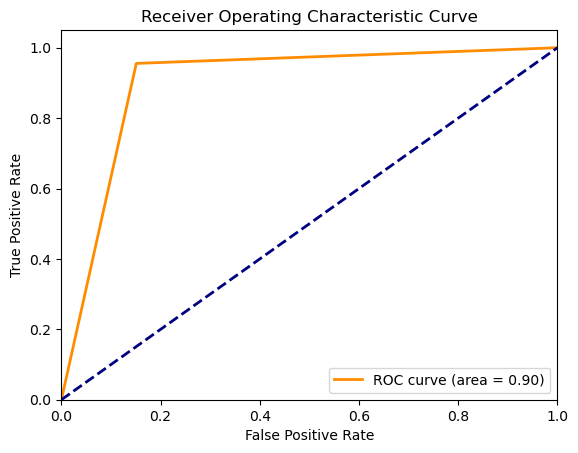

In [136]:
fpr, tpr, thresholds = roc_curve(data['labels'], data['sentiment'])
import matplotlib.pyplot as plt
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()